# Итоговая работа.

In [1]:
import numpy as np
import random
from sympy import *

from scipy.optimize import minimize
from scipy.misc import derivative
x = symbols('x')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import TruncatedSVD

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [3]:
res = [np.where(x == np.min(x[np.nonzero(x)]))[0] for x in pairwise_distances(raitings, metric='cosine')]
for x,y in enumerate(res, 1):
    print(f'{x}: {int(y)+1}')

1: 9
2: 5
3: 10
4: 10
5: 9
6: 10
7: 4
8: 6
9: 1
10: 3


In [4]:
trun_svd = TruncatedSVD(n_components=5)
raitings_transf = trun_svd.fit_transform(raitings)
raitings_transf

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [5]:
def func(x):
    return (tan(sin(x) + cos(2*x+3)))**2

der = derivative(func, 1.0, dx=1e-6)
round(der,3)

55.386

На бумаге: 55.386

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [6]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [7]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [8]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

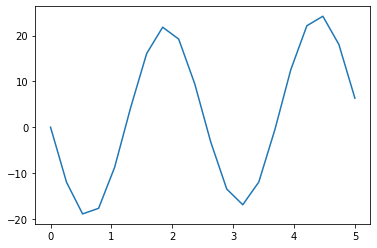

In [9]:
plt.plot(x, fx)
plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [11]:
ab = minimize(error, x0=[0,0], method='COBYLA').x
ab

array([ 3.00018796, -2.50008926])

In [12]:
a = ab[0]
b = ab[1]

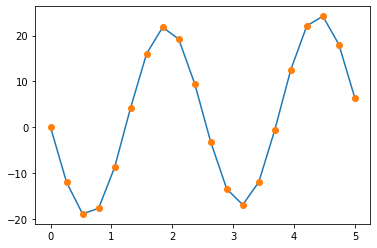

In [13]:
plt.plot(x, fx)
plt.plot(x,f(x,a,b), 'o')
plt.show()

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [14]:
drv = np.random.randint(20, size=1000)
mean = []
for x in range(1000):
    sample = random.sample(list(drv),50)
    mean.append(sum(sample)/50)

(array([  7.,  18.,  72., 152., 263., 214., 182.,  69.,  16.,   7.]),
 array([ 7.24 ,  7.752,  8.264,  8.776,  9.288,  9.8  , 10.312, 10.824,
        11.336, 11.848, 12.36 ]),
 <a list of 10 Patch objects>)

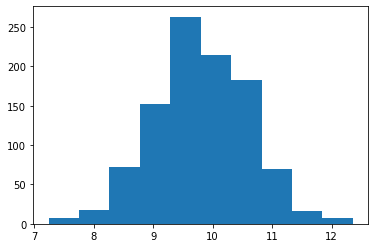

In [15]:
plt.hist(mean)

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [16]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [17]:
m = np.array([[1, 4],
              [1, 1]])
w,v = np.linalg.eig(m)
print('Собственные значения:', round(w[0]), 'и', round(w[1]), '\nСобственные векторы:', v[0], 'и', v[1])

Собственные значения: 3.0 и -1.0 
Собственные векторы: [ 0.89442719 -0.89442719] и [0.4472136 0.4472136]


Вручную: Собственные значения: 3 и -1; Собственные векторы: (2, -1) и (2, 1)